In [62]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re
from cleantext import clean
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PrathameshR10/Assignments/main/Folder/blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


<Axes: xlabel='count', ylabel='Labels'>

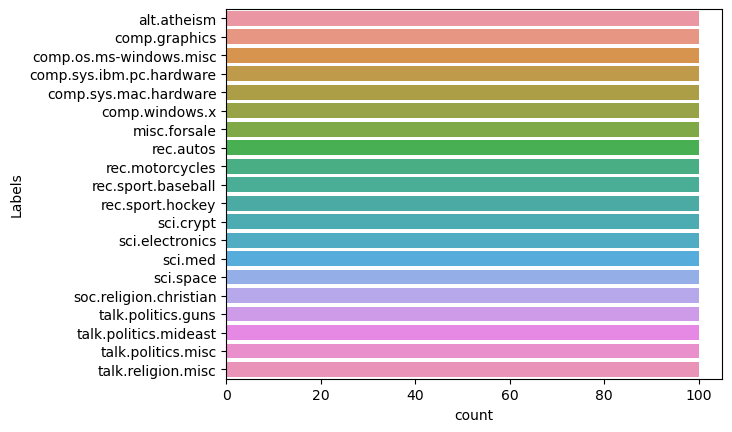

In [97]:
sns.countplot(y = df['Labels'])

In [4]:
lemma = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

### Text Pre-processing

In [8]:
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['Data'][i])   #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split()  #Tokenization
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg)    # Join sentences
    corpus.append(msg)

In [9]:
corpus

['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

### Model Building

In [28]:
y = df['Labels']           # Defining Target Variable

In [29]:
# Using TF-IDF vectorizer for feature extraction.
# TF-IDF will not only consider the frequency of word, but also assign  weight to the word according to its importance.


tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data                            # Defining x variable

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# Splitting data in Training and Testing sets

xtrain,xtest,ytrain,ytest = train_test_split(x_data,y,test_size=0.2, random_state=1)

In [86]:
# Implementing a NAIVE-BAYES CLASSIFIER

nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

In [87]:
print(classification_report(ytest,ypred))

                          precision    recall  f1-score   support

             alt.atheism       0.67      0.71      0.69        17
           comp.graphics       1.00      0.64      0.78        22
 comp.os.ms-windows.misc       0.66      1.00      0.79        21
comp.sys.ibm.pc.hardware       0.82      0.86      0.84        21
   comp.sys.mac.hardware       0.48      0.93      0.63        14
          comp.windows.x       1.00      0.45      0.62        22
            misc.forsale       0.83      0.71      0.77        21
               rec.autos       0.84      0.89      0.86        18
         rec.motorcycles       1.00      0.85      0.92        20
      rec.sport.baseball       0.95      0.95      0.95        19
        rec.sport.hockey       0.91      1.00      0.95        21
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       1.00      0.58      0.73        26
                 sci.med       0.76      0.87      0.81        15
         

### Hyper-Parameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [88]:
param = {'alpha': [0.1,0.5, 1, 10]}

# Grid Search with Cross-Validation

grid = GridSearchCV(MultinomialNB(), param_grid=param, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1, 10]}, scoring='accuracy')

In [89]:
# Getting the Best parameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

Best Parameters: {'alpha': 0.5}
Best Cross-Validation Score: 0.8331249999999999


In [90]:
# Training and evaluating the best model
best_nb_classifier = grid_search.best_estimator_
y_pred_best = best_nb_classifier.predict(X_test)

### Evaluation

In [73]:
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.82
Precision: 0.833450415427017
Recall: 0.82
F1 Score: 0.8163422596559549


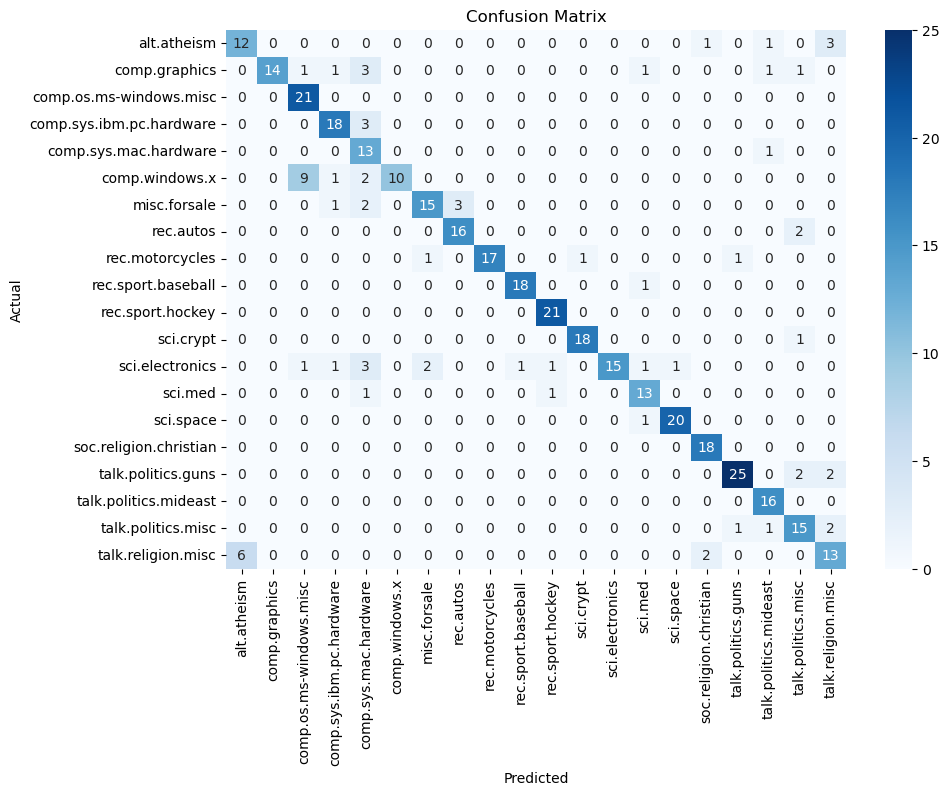

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

c_mat = confusion_matrix(ytest, ypred)
plt.figure(figsize=(10, 7))
sns.heatmap(c_mat, annot=True, cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Sentiment Analysis

In [75]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [79]:
sia = SentimentIntensityAnalyzer()

In [98]:
def get_sentiment(txt):
    sentiment_dict = sia.polarity_scores(txt)
    if sentiment_dict['compound'] >= 0.05:
        return 'positive'
    elif sentiment_dict['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [99]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [100]:
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_distribution)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.42     0.01      0.57
comp.graphics                 0.13     0.04      0.83
comp.os.ms-windows.misc       0.24     0.02      0.74
comp.sys.ibm.pc.hardware      0.21      NaN      0.79
comp.sys.mac.hardware         0.24     0.03      0.73
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.07     0.08      0.85
rec.autos                     0.27     0.01      0.72
rec.motorcycles               0.30     0.02      0.68
rec.sport.baseball            0.27     0.01      0.72
rec.sport.hockey              0.28     0.01      0.71
sci.crypt                     0.29      NaN      0.71
sci.electronics               0.18     0.04      0.78
sci.med                       0.38     0.01      0.61
sci.space                     0.32     0.03      0.65
soc.religion.christian        0.29      NaN      0.71
talk.politics.guns          

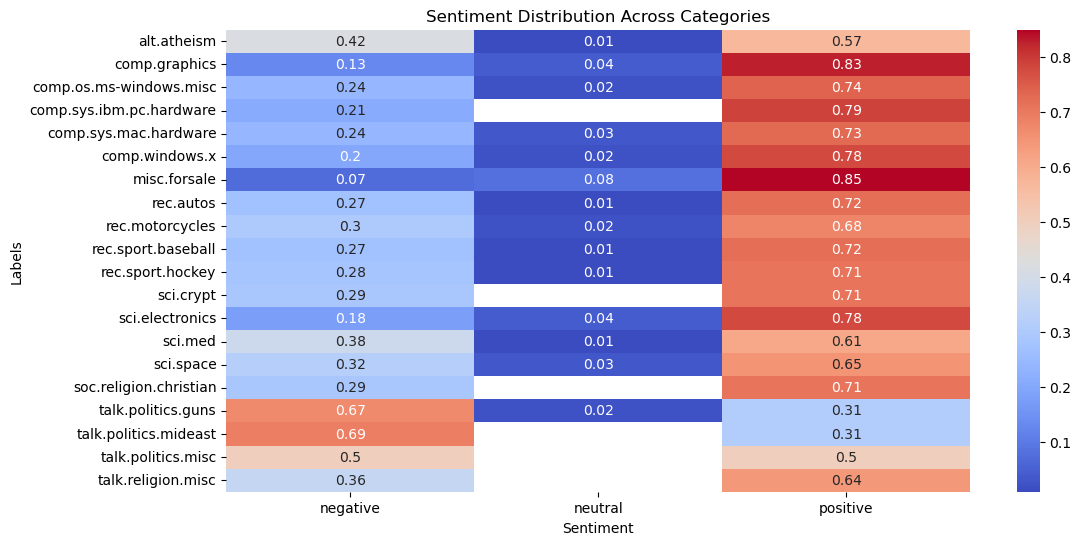

In [101]:
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_distribution, annot=True, cmap='coolwarm')
plt.title('Sentiment Distribution Across Categories')
plt.show()

### Insights on Sentiment Analysis